In [2]:
##Importing most of the libraries we have used in our assignments that we will use in this project

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

from sklearn import metrics
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from numpy import array
from numpy import argmax


# Read in the CSV file we will be using for this project 
df = pd.read_csv("./AB_NYC_2019.csv")
df[0::10]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
10,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6
20,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.07,1,0
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
40,12192,ENJOY Downtown NYC!,46978,Edward,Manhattan,East Village,40.72290,-73.98199,Private room,68,2,245,2019-06-21,2.08,2,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48850,36455584,Large studio at Union Square! for 3-5 ppl,50812891,Molo,Manhattan,East Village,40.73231,-73.98689,Entire home/apt,159,1,0,NaN,NaN,1,166
48860,36468386,纽约罗岛Roosevelt Island整租或合租 窗外美景 设施全 家具新 到曼哈顿方便 ...,228268650,Yan,Manhattan,Roosevelt Island,40.76688,-73.94688,Entire home/apt,145,1,0,NaN,NaN,1,30
48870,36474911,"Cozy, clean Williamsburg 1- bedroom apartment",1273444,Tanja,Brooklyn,Williamsburg,40.71197,-73.94946,Entire home/apt,99,4,0,NaN,NaN,1,22
48880,36481315,The Raccoon Artist Studio in Williamsburg New ...,208514239,Melki,Brooklyn,Williamsburg,40.71232,-73.94220,Entire home/apt,120,1,0,NaN,NaN,3,365


## Data analysis

In [3]:
# Price
df["price"].describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [4]:
# neighbourhood groups
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [5]:
# Avg Price in neighbourhood groups
avg_price = df.groupby("neighbourhood_group")["price"].mean()

print(avg_price)

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64


## Encode Non-Numerical Values to 0 and 1. Drop unnecessary columns from DataFrame and replace NaN values with 0.

In [6]:
# Categorical Features: neighbourhood_group, neighbourhood, room_type
encode_NYC_df = pd.get_dummies(df, columns = ['neighbourhood_group','room_type'])

# Dropping unnecessary features
encode_NYC_df = encode_NYC_df.drop(columns=['id', 'name', 'host_name', 
                      'last_review', 'host_id', 'neighbourhood'])

# Replace NaN with 0
encode_NYC_df['reviews_per_month']=encode_NYC_df['reviews_per_month'].replace(np.nan, 0)
encode_NYC_df['price']=encode_NYC_df['price'].replace(np.nan, 0)

In [7]:
# Move price to end of list
cols = encode_NYC_df.columns.tolist()
cols.append(cols.pop(cols.index('price')))
encode_NYC_df = encode_NYC_df.reindex(columns = cols)

# Sort by price
encode_NYC_df.sort_values(by='price',ascending=False,inplace=True)

encode_NYC_df.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,room_type_Entire home/apt,room_type_Private room,room_type_Shared room,price
9151,40.76810,-73.91651,100,2,0.04,1,0,0,0,0,1,0,0,1,0,10000
17692,40.73260,-73.95739,5,5,0.16,1,0,0,1,0,0,0,1,0,0,10000
29238,40.77213,-73.98665,30,0,0.00,1,83,0,0,1,0,0,1,0,0,10000
40433,40.71980,-73.98566,30,0,0.00,1,365,0,0,1,0,0,1,0,0,9999
12342,40.71355,-73.98507,99,6,0.14,1,83,0,0,1,0,0,0,1,0,9999


## Split the Dataset

In [8]:
# Feature_column and encoding
feature_cols = cols
feature_cols.pop(feature_cols.index('price'))
X = encode_NYC_df[feature_cols]
y = encode_NYC_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the first 5 lines
print(X_test)
print('\n')
print(y_test)


# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

       latitude  longitude  minimum_nights  number_of_reviews  \
45894  40.71550  -73.94656               2                  0   
20869  40.71753  -73.94946               2                  1   
38075  40.77829  -73.95093               5                  5   
11825  40.62402  -73.97071               1                  1   
41261  40.72595  -73.90299               1                 24   
...         ...        ...             ...                ...   
45273  40.70372  -73.90670               2                  1   
449    40.68288  -73.96024               3                 43   
5464   40.71305  -73.94334               6                  0   
22940  40.74530  -74.00002               3                 24   
16518  40.67323  -73.88920               3                 71   

       reviews_per_month  calculated_host_listings_count  availability_365  \
45894               0.00                               3               313   
20869               0.03                               1       

## Random Forest Classifier

In [9]:
## Using Random Forest Classifier with parameters: n_estimators = 19, bootstrap = True, random_state=3
my_RandomForest = RandomForestClassifier(n_estimators = 55, bootstrap = True, random_state=3, 
                                         min_samples_split = 3, min_samples_leaf =2)

my_RandomForest.fit(X_train, y_train)

y_predict_rf = my_RandomForest.predict(X_test)

print(y_predict_rf)

# calculate final accuracy
accuracy_rf = accuracy_score(y_test, y_predict_rf)

print("The accuracy is", "{:.1f}".format(accuracy_rf * 100), "%")

[995  50 150 ... 150 200  75]
The accuracy is 9.3 %


## Linear Regression

In [10]:
# In the following line, "my_LinReg" is instantiated as an "object" of LinearRegression "class"
my_LinReg = LinearRegression()

# Fitting the model to the training dataset
my_LinReg.fit(X_train, y_train)

# Printing Theta0 using attribute "intercept_":
print(my_LinReg.intercept_)

# Printing [Theta1, Theta2, Theta3] using attribute "coef_":
print(my_LinReg.coef_)

-26961.279045232568
[-2.17828581e+02 -4.85648665e+02 -1.25300808e-01 -2.64843440e-01
 -2.50225121e+00 -1.79729070e-01  1.99885361e-01  3.50849699e+01
 -3.78364567e+00  6.04944386e+01  2.45984963e+01 -1.16394259e+02
  8.27941466e+01 -2.33046783e+01 -5.94894684e+01]


In [31]:
# Predictions on the testing set
predict_price = my_LinReg.predict(X_test)

print(predict_price)

# Calculating "Mean Square Error" (MSE):
mse = metrics.mean_squared_error(y_test, predict_price)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rmse = np.sqrt(mse)

print(rmse)

[222.55430215  54.87709556 157.45175529 ... 158.81833043 237.61354283
  76.42234203]
248.20850294239688


In [50]:
# Applying 10-fold cross validation with "Linear Regression":
my_LinReg = LinearRegression()
mse_list = cross_val_score(my_LinReg, X, y, cv=10, scoring='neg_mean_squared_error')
#print(mse_list)

# in order to calculate root mean square error (rmse), we have to make them positive!
mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
#print(rmse_list)

# calculate the average RMSE as final result of cross validation:
print(rmse_list.mean())

134.56272150604175


## Logistic Regression - WIP

# KNN

In [12]:
# Instantiating KNeighborsClassifier with an list of different K values:

k = [3,5,15,25]

for i in k:
    my_knn = KNeighborsClassifier(n_neighbors = i)

    # Training set
    my_knn.fit(X_train, y_train)

    # Testing on the testing set:
    y_predict_knn = my_knn.predict(X_test)

    print(y_predict_knn)

    # find the accuracy of knn:
    accuracy_knn = accuracy_score(y_test, y_predict_knn)
    print("The accuracy using KNN Algorithm with k =",i, "is", "{:.1f}".format(accuracy_knn * 100), "%")
    

[ 70  45  47 ...  80 110  36]
The accuracy using KNN Algorithm with k = 3 is 3.8 %
[ 42  45  47 ... 150 110  36]
The accuracy using KNN Algorithm with k = 5 is 3.5 %
[ 70  75  45 ... 150 110  36]
The accuracy using KNN Algorithm with k = 15 is 4.4 %
[ 70  60  80 ... 150 110 200]
The accuracy using KNN Algorithm with k = 25 is 4.6 %


# Decision Tree

In [13]:
# "my_decisiontree" is instantiated as an "object" of DecisionTreeClassifier "class". 
my_decisiontree = DecisionTreeClassifier(random_state=5)

# We can use the method "fit" of the objects "my_decisiontree" along with training dataset and labels to train the model.
my_decisiontree.fit(X_train, y_train)

# Testing on the testing set:
y_predict_dt = my_decisiontree.predict(X_test)

# percent of correct predictions:
accuracy_dt = accuracy_score(y_test, y_predict_dt)

print("The accuracy using Decision Tree is", "{:.1f}".format(accuracy_dt * 100), "%")

The accuracy using Decision Tree is 6.1 %


# Random Forest Regressor

In [18]:
# "my_randforest" is instantiated as an "object" of RandomForestRegressor "class". 
my_randforest = RandomForestRegressor()

# We can use the method "fit" of the objects "my_randforest" along with training dataset and labels to train the model.
my_randforest.fit(X_train,y_train)

# Testing on the testing set:
y_predict_rfr = my_randforest.predict(X_test)

print(y_predict_rfr)

# Calculating "Mean Square Error" (MSE):
rfr_mse= metrics.mean_squared_error(y_test,y_predict_rfr)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rfr_rmse = np.sqrt(rfr_mse)

print(rfr_rmse)

[443.49  84.75 134.17 ... 203.21 210.39  58.26]
241.48616884421514


In [34]:
# Applying 10-fold cross validation with "Random Forest Regressor":
my_randforest = RandomForestRegressor()
mse_list = cross_val_score(my_randforest, X, y, cv=10, scoring='neg_mean_squared_error')
#print(mse_list)

# in order to calculate root mean square error (rmse), we have to make them positive!
mse_list_positive = -mse_list

# using numpy sqrt function to calculate rmse:
rmse_list = np.sqrt(mse_list_positive)
#print(rmse_list)

# calculate the average RMSE as final result of cross validation:
print(rmse_list.mean())

174.8482989781657


# xgboost

rmse 236.94952927708715


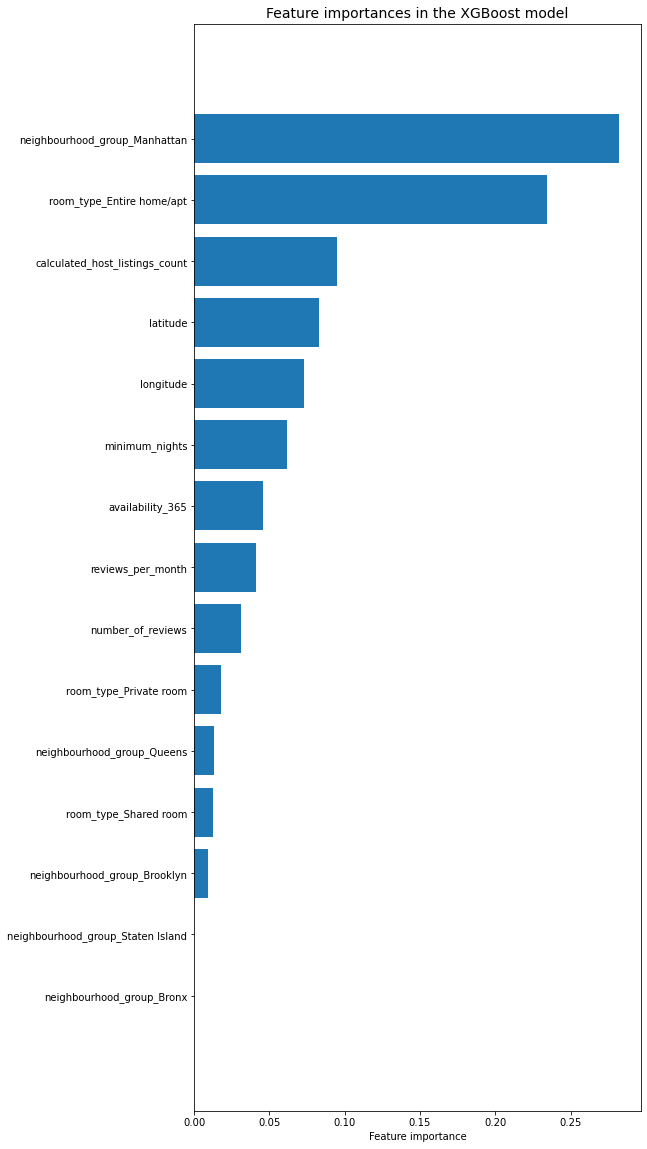

In [54]:
#pip install xgboost

import xgboost as xgb

# Fitting the model
xgb_regressor = xgb.XGBRegressor()
xgb_regressor.fit(X_train, y_train)

# Testing on the testing set:
y_predict_xgb = xgb_regressor.predict(X_test)


# Calculating "Mean Square Error" (MSE):
rfr_mse= metrics.mean_squared_error(y_test,y_predict_xgb)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
rfr_rmse = np.sqrt(rfr_mse)

print('rmse',rfr_rmse)

training_preds_xgb_reg = xgb_regressor.predict(X_train)
y_predict_xgb = xgb_regressor.predict(X_test)

# Producing a dataframe of feature importances
ft_weights_xgb_reg = pd.DataFrame(xgb_regressor.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)

# Plotting feature importances
plt.figure(figsize=(8,20))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances in the XGBoost model", fontsize=14)
plt.xlabel("Feature importance")
plt.margins(y=0.1)

# Lasso Regressor

In [49]:
from sklearn.linear_model import Lasso

#Initializing the Lasso Regressor with Normalization Factor as True
lasso_reg = Lasso(normalize=True)

#Fitting the Training data to the Lasso regressor
lasso_reg.fit(X_train,y_train)

#Predicting for X_test
y_predict_lass =lasso_reg.predict(X_test)

print(y_predict_lass)

# Calculating "Mean Square Error" (MSE):
lass_mse= metrics.mean_squared_error(y_test,y_predict_lass)

# Using numpy sqrt function to take the square root and calculate "Root Mean Square Error" (RMSE)
lass_rmse = np.sqrt(lass_mse)

print(lass_rmse)

[152.12987203 152.12987203 152.12987203 ... 152.12987203 152.12987203
 152.12987203]
259.2655042329369
